<center><h1>In the name of Allah</h1></center>

Name: Esra Kashaninia

Student Number: 402210676

In this notebook, you will explore adversarial attacks and training methods in deep learning. First, you will train a simple model, ResNet18, on the CIFAR-10 dataset. Next, you will learn about two different adversarial attacks: FGSM (Fast Gradient Sign Method) and PGD (Projected Gradient Descent). To enhance your understanding, you will implement the PGD attack from scratch, while the FGSM attack will be implemented using a library. After this, you will use the FGSM attack to generate adversarial examples and then perform adversarial training on the model using the CIFAR-10 dataset. Finally, you will compare the performance and robustness of the adversarially trained model with the original model.

Good luck!

## outline
- Train Resnet on CIFAR10
- FGSM Attack using torchattacks
- PGD Attack from scratch
- Visualization
- Adversarial Training


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


In [3]:
!pip install torchattacks

## Train Resnet on CIFAR10 (15 pts)

In [4]:
# Prepare Cifar10 data
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(),])

##############################################################################
# Prepare training and test datasets and dataloaders                         #
##############################################################################
trainset =  torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)
################################ End #########################################

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


In [5]:
# model architecture
class resnet(nn.Module):
  def __init__(self, num_cls):
    super().__init__()
    self.conv = nn.Sequential(*list(resnet18(weights=None).children())[:-2])
    self.fc = nn.Linear(512, num_cls)

  def forward(self, x):
    x = self.conv(x)
    x = torch.flatten(x, start_dim=1)
    logits = self.fc(x)
    return logits

##############################################################################
# Initialize model and move to device                                        #
##############################################################################
model = resnet(num_cls=10)
model = model.to(device)

################################ End #########################################

In [6]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
epochs = 20 # Because No GPU :(

In [7]:
##############################################################################
# Implement train loop and log training loss after each epoch                #
##############################################################################
from math import log

for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for inputs, labels in tqdm(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print("Epoch", str(epoch+1))
    print('Train accuarcy:', correct * 100 / total)
    print('Train loss:', log(train_loss))
    print("-" * 150)

################################ End #########################################

  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 391/391 [00:17<00:00, 22.02it/s]


Epoch 1
Train accuarcy: 45.08
Train loss: 6.39700355409911
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:16<00:00, 23.05it/s]


Epoch 2
Train accuarcy: 59.652
Train loss: 6.095742419696516
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 20.98it/s]


Epoch 3
Train accuarcy: 67.324
Train loss: 5.899157118548415
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:17<00:00, 22.04it/s]


Epoch 4
Train accuarcy: 72.486
Train loss: 5.724768582618239
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.18it/s]


Epoch 5
Train accuarcy: 76.894
Train loss: 5.546928669403257
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 20.95it/s]


Epoch 6
Train accuarcy: 80.62
Train loss: 5.3688032394584795
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.20it/s]


Epoch 7
Train accuarcy: 83.974
Train loss: 5.186706200387658
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.09it/s]


Epoch 8
Train accuarcy: 87.17
Train loss: 4.962402826832024
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.63it/s]


Epoch 9
Train accuarcy: 89.572
Train loss: 4.757018420751276
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 20.99it/s]


Epoch 10
Train accuarcy: 91.014
Train loss: 4.590114056837432
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.54it/s]


Epoch 11
Train accuarcy: 92.932
Train loss: 4.370067248102195
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.16it/s]


Epoch 12
Train accuarcy: 94.016
Train loss: 4.180384391493732
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 20.98it/s]


Epoch 13
Train accuarcy: 94.878
Train loss: 4.047490876570872
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.54it/s]


Epoch 14
Train accuarcy: 95.486
Train loss: 3.9060339833338706
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 20.96it/s]


Epoch 15
Train accuarcy: 96.422
Train loss: 3.6628869247066733
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.53it/s]


Epoch 16
Train accuarcy: 96.976
Train loss: 3.519523674015656
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 20.79it/s]


Epoch 17
Train accuarcy: 97.46
Train loss: 3.36079879802511
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.54it/s]


Epoch 18
Train accuarcy: 97.704
Train loss: 3.2498809541330083
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.08it/s]


Epoch 19
Train accuarcy: 97.964
Train loss: 3.1327910038002
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:18<00:00, 21.58it/s]

Epoch 20
Train accuarcy: 98.32
Train loss: 2.955285566584927
------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
##############################################################################
# Evaluate the trained model on test set and print test accuracy             #
##############################################################################

model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(testloader):
        inputs, labels = inputs.to(device), labels.to(device)
        total += labels.size(0)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()

print('Test accuarcy:', correct * 100 / total)
print('Test loss:', log(test_loss))
print("-" * 150)

################################ End #########################################

 87%|████████▋ | 69/79 [00:01<00:00, 44.65it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 79/79 [00:01<00:00, 41.89it/s]

Test accuarcy: 69.49
Test loss: 5.003338993457248
------------------------------------------------------------------------------------------------------------------------------------------------------


In [9]:
# Save model
model.eval()
model_name = "resnet18_cifar10_model_pretrained.pth"
model_PATH = f"{model_name}"
torch.save(model.state_dict(), model_PATH)

## FGSM Attack using torchattacks (10 pts)

In this section you should run FGSM attack using torchattacks library (https://adversarial-attacks-pytorch.readthedocs.io/en/latest/index.html).

Run the attack for $\epsilon \in \{\frac{1}{255}, \frac{4}{255}, \frac{8}{255},\}$ report the performance of the model on untargeted FGSM attack on the test data.

In [10]:
##############################################################################
# run untargeted FGSM attack for epsilon = 1/255 and report its accuracy     #
##############################################################################

import torchattacks
attack = torchattacks.FGSM(model, eps=1/255)

tst_loss = 0
correct = 0
total = 0
for inputs, labels in tqdm(testloader):
    inputs, labels = inputs.to(device), labels.to(device)
    adv_inputs = attack(inputs, labels)
    total += labels.size(0)

    outputs = model(adv_inputs)
    loss = criterion(outputs, labels)
    tst_loss += loss.item()

    _, predicted = outputs.max(1)
    correct += predicted.eq(labels).sum().item()


print('FGSM with epsilon = 1/255 test accuarcy:', correct * 100 / total)
print('Total test loss:', log(tst_loss))



################################ End #########################################

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
 96%|█████████▌| 76/79 [00:04<00:00, 19.61it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 79/79 [00:04<00

FGSM with epsilon = 1/255 test accuarcy: 49.97
Total test loss: 5.735009279553102


In [11]:
##############################################################################
# run untargeted FGSM attack for epsilon = 4/255 and report its accuracy     #
##############################################################################

attack = torchattacks.FGSM(model, eps=4/255)

tst_loss = 0
correct = 0
total = 0
for inputs, labels in tqdm(testloader):
    inputs, labels = inputs.to(device), labels.to(device)
    adv_inputs = attack(inputs, labels)
    total += labels.size(0)

    outputs = model(adv_inputs)
    loss = criterion(outputs, labels)
    tst_loss += loss.item()

    _, predicted = outputs.max(1)
    correct += predicted.eq(labels).sum().item()


print('FGSM with epsilon = 4/255 test accuarcy:', correct * 100 / total)
print('Total test loss:', log(tst_loss))





################################ End #########################################

100%|██████████| 79/79 [00:03<00:00, 20.25it/s]

FGSM with epsilon = 4/255 test accuarcy: 17.77
Total test loss: 6.740581304808986


In [12]:
##############################################################################
# run untargeted FGSM attack for epsilon = 8/255 and report its accuracy     #
##############################################################################

attack = torchattacks.FGSM(model, eps=8/255)

tst_loss = 0
correct = 0
total = 0
for inputs, labels in tqdm(testloader):
    inputs, labels = inputs.to(device), labels.to(device)
    adv_inputs = attack(inputs, labels)
    total += labels.size(0)

    outputs = model(adv_inputs)
    loss = criterion(outputs, labels)
    tst_loss += loss.item()

    _, predicted = outputs.max(1)
    correct += predicted.eq(labels).sum().item()


print('FGSM with epsilon = 8/255 test accuarcy:', correct * 100 / total)
print('Total test loss:', log(tst_loss))

################################ End #########################################

100%|██████████| 79/79 [00:03<00:00, 20.89it/s]

FGSM with epsilon = 8/255 test accuarcy: 8.47
Total test loss: 7.171068061031422


## PGD Attack from scratch (30 pts)

In this section you should implement PGD attack from scratch.

In [31]:
class LinfPGDAttack(object):

    def __init__(self, model, epsilon = 8/255, k = 2, alpha = 2/255):
        self.model = model
        self.epsilon = epsilon
        self.steps = k
        self.alpha = alpha

    def __call__(self, image, label):

        image = image.to(device)
        label = label.to(device)

        out = self.model(image)
        _, pred = torch.max(out, 1)

        perturbed_image = image.clone()
        perturbed_image.to(device)

        if pred.item() == label.item():
            ##############################################################################
            # Implement a k step PGD attack of size alpha                                #
            # while always staying within epsilon distance from the initial point        #
            # Use cross entropy loss                                                     #
            ##############################################################################

            perturbed_image += torch.zeros_like(perturbed_image).uniform_(-1 * self.epsilon, self.epsilon)

            for i in range(self.steps):
                perturbed_image.requires_grad_()
                with torch.enable_grad():
                    loss = F.cross_entropy(self.model(perturbed_image), label)
                grad = torch.autograd.grad(loss, [perturbed_image])[0]

                perturbed_image = perturbed_image.detach()
                perturbed_image += self.alpha * torch.sign(grad.detach())
                perturbed_image = torch.min(torch.max(perturbed_image, image - self.epsilon), image + self.epsilon)
                perturbed_image = torch.clamp(perturbed_image, 0, 1)
            # print(perturbed_image)

            ################################ End #########################################

        return perturbed_image

In [32]:
##############################################################################
# Evaluate PGD attack on the trained model with k=2,4,8                      #
##############################################################################

k_list = [2,4,8]

##############################################################################

# Your code goes here
for ki in k_list:
    print("Results for k =", ki)
    adversary = LinfPGDAttack(model, epsilon = 8/255, k = ki, alpha = 2/255)
    model.eval()

    tst_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in tqdm(testloader):
            inputs, labels = inputs.to(device), labels.to(device)
            total += labels.size(0)
            # print(inputs.size(), labels.size())

            # temp = torch.zeros(size=inputs.size()).to(device)
            # for j in range(inputs.size(0)):
            #     x = inputs[j].unsqueeze(0).clone()
            #     if j == 0:
            #         print("x size", x.size())
            #     print(x)
            #     adv = adversary(x, labels[j].unsqueeze(0))
            #     temp[j] = x.squeeze(0).clone()

            # adv = adversary(temp, labels)
            temp = torch.stack([adversary(torch.unsqueeze(input, 0),
                                       torch.unsqueeze(label, 0)).squeeze()
                                       for input, label in zip(inputs, labels)])

            outputs = model(temp)
            loss = criterion(outputs, labels)
            tst_loss += loss.item()

            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()

    print('Total adversarial test Accuarcy:', correct * 100 / total)
    print('Total adversarial test loss:', log(tst_loss))

################################ End #########################################

Results for k = 2


100%|██████████| 79/79 [01:56<00:00,  1.47s/it]


Total adversarial test Accuarcy: 16.82
Total adversarial test loss: 6.277417831143963
Results for k = 4


100%|██████████| 79/79 [03:19<00:00,  2.52s/it]


Total adversarial test Accuarcy: 4.51
Total adversarial test loss: 6.899872098183463
Results for k = 8


100%|██████████| 79/79 [06:04<00:00,  4.62s/it]

Total adversarial test Accuarcy: 0.96
Total adversarial test loss: 7.280637620491841


## Visualization (10 pts)

Implement a function to plot the original image, the perturbed imaged and their predicted labels by the model

In [15]:
##############################################################################
# Implement the function described                                           #
##############################################################################


import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plotimg(img, perturbed_img, label, perturbed_label):
    global classes
    class_dict = {i:e for i, e in enumerate(list(classes))}
    f, axarr = plt.subplots(1, 2, figsize=(6, 3))
    # print(img.shape, type(img), perturbed_img.shape, type(perturbed_img))
    # print(class_dict)
    # print(label.detach().cpu().item())
    # print()
    axarr[0].imshow(img)
    axarr[0].set_title(str("imperturbed mode\nassigned class:" + str(class_dict[label.detach().cpu().item()])), size=8)
    axarr[1].imshow(perturbed_img)
    axarr[1].set_title(str("perturbed mode\nassigned class:" + str(class_dict[perturbed_label.detach().cpu().item()])), size=8)
    axarr[0].get_xaxis().set_visible(False)
    axarr[0].get_yaxis().set_visible(False)
    axarr[1].get_xaxis().set_visible(False)
    axarr[1].get_yaxis().set_visible(False)
    plt.show()

################################ End #########################################

  0%|          | 0/79 [00:00<?, ?it/s]

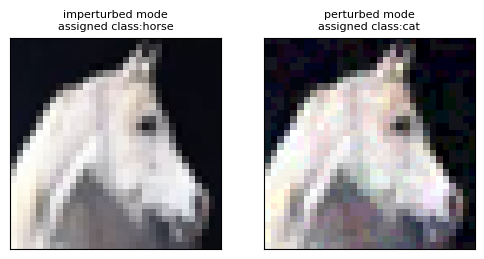

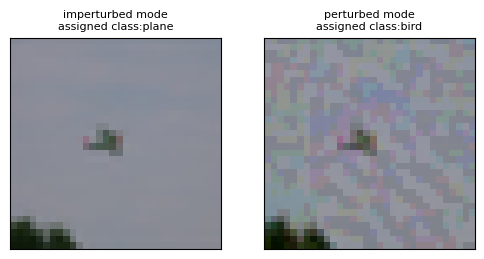

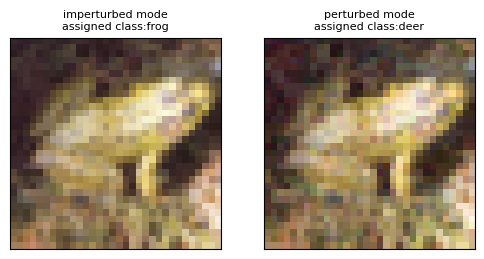

  0%|          | 0/79 [00:00<?, ?it/s]


In [16]:
##############################################################################
# Choose 3 random images from testset and run FGSM attack and visualize      #
##############################################################################
attack = torchattacks.FGSM(model, eps=8/255)

model.eval()
total = 0

for inputs, labels in tqdm(testloader):
    inputs, labels = inputs.to(device), labels.to(device)

    # Shuffle so that samples are random
    indices = torch.randperm(labels.size()[0])
    inputs = inputs[indices]
    labels = labels[indices]
    total += labels.size(0)

    outputs = model(inputs)
    _, predicted = outputs.max(1)

    adv = attack(inputs, labels)
    adv_outputs = model(adv)
    _, predicted2 = adv_outputs.max(1)

    plot_count = 0
    for img, perturbed_img, label, perturbed_label, true_label in zip(inputs, adv, predicted, predicted2, labels):
        if label == true_label and perturbed_label != true_label:
            # print(img.T.detach().cpu().numpy().shape, perturbed_img.T.detach().cpu().numpy().shape, inputs.shape, adv.shape)
            plotimg(img.permute(1, 2, 0).detach().cpu().numpy(), perturbed_img.permute(1, 2, 0).detach().cpu().numpy(), label, perturbed_label)
            plot_count += 1
        if plot_count >= 3:
            break
    break


################################ End #########################################

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


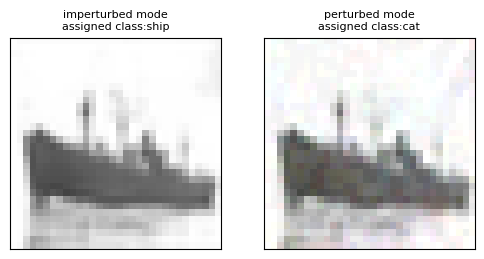

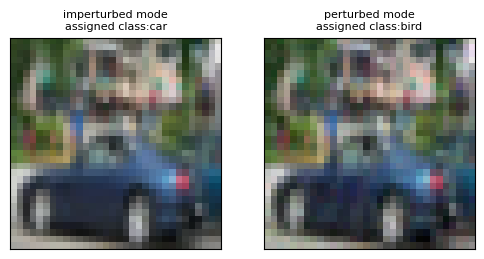

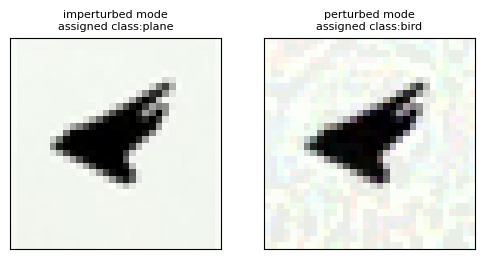

  0%|          | 0/79 [00:05<?, ?it/s]


In [18]:
##############################################################################
# Choose 3 random images from testset and run PGD attack and visualize      #
##############################################################################

adversary = LinfPGDAttack(model, epsilon = 8/255, k = 8, alpha = 2/255)
model.eval()
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(testloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Shuffle so that samples are random
        indices = torch.randperm(labels.size()[0])
        inputs = inputs[indices]
        labels = labels[indices]
        total += labels.size(0)

        outputs = model(inputs)
        _, predicted = outputs.max(1)

        # temp = torch.zeros(size=inputs.size()).to(device)
        # for j in range(inputs.size(0)):
        #     x = inputs[j].unsqueeze(0)
        #     adv = adversary(x, labels[j].unsqueeze(0))
        #     temp[j] = x.squeeze(0)
        temp = torch.stack([adversary(torch.unsqueeze(input, 0),
                                       torch.unsqueeze(label, 0)).squeeze()
                                       for input, label in zip(inputs, labels)])

        outputs = model(temp)
        _, predicted2 = adv_outputs.max(1)

        plot_count = 0
        # print(inputs.shape, adv.shape, predicted.shape, predicted2.shape, labels.shape)
        for img, perturbed_img, label, perturbed_label, true_label in zip(inputs, temp, predicted, predicted2, labels):
            if label == true_label and perturbed_label != true_label:
                # print(img.T.detach().cpu().numpy().shape, perturbed_img.T.detach().cpu().numpy().shape, inputs.shape, adv.shape)
                plotimg(img.permute(1, 2, 0).detach().cpu().numpy(), perturbed_img.permute(1, 2, 0).detach().cpu().numpy(), label, perturbed_label)
                plot_count += 1
            if plot_count >= 3:
                break
        break

################################ End #########################################

## Adversarial Training (35 pts)

In this section you are going to adversarially train your model and see the results.

In [20]:
##############################################################################
# Load a new resnet model for adversarial training                           #
# Train the model on perturbed images from                                   #
# untargeted FGSM attack with epsilon = 8/255 on train dataset               #
# Also use the following setup for training the model                        #
##############################################################################

adv_model = resnet(num_cls=10) # Your code goes here
adv_model.to(device)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(adv_model.parameters(), lr=learning_rate, momentum=0.9)
epochs = 25 # No GPU :(


# Your code goes here
attack = torchattacks.FGSM(adv_model, eps=8/255)


for epoch in range(epochs):
    adv_model.train()
    train_loss = 0
    correct = 0
    total = 0

    for inputs, labels in tqdm(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        adv = attack(inputs, labels)
        outputs = adv_model(adv)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print("Epoch", str(epoch+1))
    print('Train accuarcy:', correct * 100 / total)
    print('Train loss:', log(train_loss))
    print("-" * 150)

################################ End #########################################

  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 391/391 [00:34<00:00, 11.46it/s]


Epoch 1
Train accuarcy: 21.252
Train loss: 6.72338063457149
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.12it/s]


Epoch 2
Train accuarcy: 25.18
Train loss: 6.656494686721692
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.04it/s]


Epoch 3
Train accuarcy: 27.466
Train loss: 6.626603442165215
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.87it/s]


Epoch 4
Train accuarcy: 28.878
Train loss: 6.602645435785402
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.05it/s]


Epoch 5
Train accuarcy: 30.418
Train loss: 6.580951770077907
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.89it/s]


Epoch 6
Train accuarcy: 31.458
Train loss: 6.562590732088269
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.01it/s]


Epoch 7
Train accuarcy: 32.418
Train loss: 6.54493764228571
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.03it/s]


Epoch 8
Train accuarcy: 33.312
Train loss: 6.5280379549175676
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.01it/s]


Epoch 9
Train accuarcy: 34.26
Train loss: 6.509805773772537
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.97it/s]


Epoch 10
Train accuarcy: 35.342
Train loss: 6.489384443496261
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.94it/s]


Epoch 11
Train accuarcy: 36.374
Train loss: 6.470527308980361
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.00it/s]


Epoch 12
Train accuarcy: 37.082
Train loss: 6.452161922549374
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.97it/s]


Epoch 13
Train accuarcy: 38.454
Train loss: 6.428667926842067
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.94it/s]


Epoch 14
Train accuarcy: 39.072
Train loss: 6.408019764533238
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.02it/s]


Epoch 15
Train accuarcy: 40.53
Train loss: 6.380909210145742
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.87it/s]


Epoch 16
Train accuarcy: 41.294
Train loss: 6.358599330321802
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.01it/s]


Epoch 17
Train accuarcy: 42.49
Train loss: 6.3346318644537964
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.05it/s]


Epoch 18
Train accuarcy: 43.552
Train loss: 6.3061340661771625
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.89it/s]


Epoch 19
Train accuarcy: 45.206
Train loss: 6.2752359847165815
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.08it/s]


Epoch 20
Train accuarcy: 46.18
Train loss: 6.246247633447389
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.01it/s]


Epoch 21
Train accuarcy: 47.374
Train loss: 6.219964608943077
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 11.89it/s]


Epoch 22
Train accuarcy: 49.156
Train loss: 6.181046367140844
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.07it/s]


Epoch 23
Train accuarcy: 50.076
Train loss: 6.156518692535896
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.02it/s]


Epoch 24
Train accuarcy: 51.504
Train loss: 6.1240809138965915
------------------------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 391/391 [00:32<00:00, 12.07it/s]

Epoch 25
Train accuarcy: 52.81
Train loss: 6.092435621979808
------------------------------------------------------------------------------------------------------------------------------------------------------


In [21]:
##############################################################################
# Evaluate the new model on the test dataset                                 #
##############################################################################

# Your code goes here
adv_model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(testloader):
        inputs, labels = inputs.to(device), labels.to(device)
        total += labels.size(0)

        outputs = adv_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()

print('Test accuarcy:', correct * 100 / total)
print('Test loss:', log(test_loss))
print("-" * 150)

################################ End #########################################

100%|██████████| 79/79 [00:01<00:00, 40.58it/s]

Test accuarcy: 56.91
Test loss: 4.592612855187354
------------------------------------------------------------------------------------------------------------------------------------------------------


In [24]:
##############################################################################
# Run FGSM attack on the adversarially trained model with epsilon = 8/255    #
##############################################################################

# Your code goes here
attack = torchattacks.FGSM(adv_model, eps=8/255)

tst_loss = 0
correct = 0
total = 0
for inputs, labels in tqdm(testloader):
    inputs, labels = inputs.to(device), labels.to(device)
    adv_inputs = attack(inputs, labels)
    total += labels.size(0)

    outputs = adv_model(adv_inputs)
    loss = criterion(outputs, labels)
    tst_loss += loss.item()

    _, predicted = outputs.max(1)
    correct += predicted.eq(labels).sum().item()


print('FGSM with epsilon = 8/255 test accuarcy:', correct * 100 / total)
print('Total test loss:', log(tst_loss))

################################ End #########################################

100%|██████████| 79/79 [00:03<00:00, 20.47it/s]

FGSM with epsilon = 8/255 test accuarcy: 27.83
Total test loss: 5.259329679354128


In [26]:
##############################################################################
#  Run PGD attack on the adversarially trained model with k=4                #
##############################################################################

# Your code goes here
adversary = LinfPGDAttack(adv_model, epsilon = 8/255, k = 4, alpha = 2/255)
adv_model.eval()

tst_loss = 0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in tqdm(testloader):
        inputs, labels = inputs.to(device), labels.to(device)
        total += labels.size(0)
        # print(inputs.size(), labels.size())

        # temp = torch.zeros(size=inputs.size()).to(device)
        # for j in range(inputs.size(0)):
        #     x = inputs[j].unsqueeze(0).clone()
        #     if j == 0:
        #         print("x size", x.size())
        #     print(x)
        #     adv = adversary(x, labels[j].unsqueeze(0))
        #     temp[j] = x.squeeze(0).clone()

        # adv = adversary(temp, labels)
        temp = torch.stack([adversary(torch.unsqueeze(input, 0),
                                    torch.unsqueeze(label, 0)).squeeze()
                                    for input, label in zip(inputs, labels)])

        outputs = adv_model(temp)
        loss = criterion(outputs, labels)
        tst_loss += loss.item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()

print('Total adversarial test Accuarcy:', correct * 100 / total)
print('Total adversarial test loss:', log(tst_loss))

################################ End #########################################

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 79/79 [05:02<00:00,  3.83s/it]

Total adversarial test Accuarcy: 22.51
Total adversarial test loss: 4.97637265066819


Answer the following questions:
- What happened to the accuracy of the adversarially trained model?
- What do you conclude from the result of the FGSM attack on the adversarially trained model?
- What do you conclude from the result of the PGD attack on the adversarially trained model?
- What is you final conclusion?

<div dir="rtl">
<font face="tahoma" size=5 color="navy">
<ol>
<li>
<p>
نسبت به مدلی که عادی ترین شده باشد روی داده تست دقت کمتری دارد بخاطر اینکه توزیع داده‌ای که روی آن ترین شده بیشتر با توزیع داده‌ی تست فرق می‌کند.
</p>
</li>

<li>
<p>
مدل عادی روی داده‌ی تست ۶۹ درصد دقت داشت (چون فقط ۲۰ تا ایپاک ترین شده بود) اما FGSM معمولی یا پارامتر ۱/۲۵۵ هم می‌توانست دقت آن را تا ۲۰ درصد پایین بیاورد. با افزایش eps به ۸/۲۵۵، دقت به ۸.۵ درصد کاهش پیدا میکرد اما نتیجه این بود که در عکس‌ها هم perturbation قابل‌تشخیص‌تر بود چون می‌دانیم FGSM داده را دقیقا به اندازه‌ eps شیفت می‌دهد نه مثل PGD که می‌تواند داده را کمتر از eps هم شیفت بدهد (بسته به مشتق)
اما وقتی adversarial training انجام دادیم دقت روی داده‌ی تست perturbشده از ۸.۵ به ۲۷.۸ درصد افزایش پیدا کرد.

</p>
</li>

<li>
<p>
PGD دقت مدل را بیشتر کاهش می‌دهد و با ۴ تا ایتریشن دقت را به 4.5 درصد کاهش می‌دهد و با ۸ تا ایتریشن به زیر ۱ درصد می‌رساند و دلیلش هم این است که perturbation را برخلاف FSGM در k تا ایتریشن انجام می‌دهد. مشاهده می‌کنیم که به ازای epsilon یکسان هم perturbation در عکس‌ها کمتر از FSGM قابل مشاهده است.
وقتی adversarial training انجام دادیم، دقت مدل به 22.5 درصد افزایش پیدا کرد که نسبت به FGSM کمتر است اما باز هم خیلی بهتر از ۴.۷ درصدی است که مدلی که روی داده‌ی عادی ترین شده بود بدست می‌آورد.
</p>
</li>

<li>
<p>
اول با دیدن نتایج روی داده‌ی تست perturbنشده می‌فهمیم که بین robustness و دقت در زمان تست یک tradeoff وجود دارد (که در سوال ۱ گفته شد) دوما حتی با انجام دادن adversarial training هم مدل نمی‌تواند کاملا روی داده‌ی تست perturbشده همان دقت داده‌ی تست perturbنشده را بدست بیاورد.
</p>
</li>
</ol>
</font>
</div>